## AI lab final-exam practice

______________
lab material: https://github.com/tauhaimran/AI-algorithms/tree/main/LabTasks


my practice: https://colab.research.google.com/drive/1nUDQVv8Gu-SjLcxqoLSt3bdCksnuwYaX?usp=sharing

______________
#### Syllabus

##### lab--topic

8 ---- CSP

9 ---- Minimax - Adversarial search

10 --- Alpha-Beta Pruning - Adversarial search

11 --- Data Preprocessing - pandas

12.1 --- KNN

12.2 --- measuring Model Performance

13 --- Decision Trees

14 --- K-means clustering

----



## lab8 - CSP

In [9]:
#define the csp class
from collections import deque, defaultdict
import copy

class CSP:
    def __init__(self, variables, domains, neighbors):
        self.variables = variables  # list of variables
        self.domains = domains      # dict var -> list of possible values
        self.neighbors = neighbors  # dict var -> list of adjacent variables

    def is_consistent(self, var, value, assignment):
        for neighbor in self.neighbors[var]:
            if neighbor in assignment and assignment[neighbor] == value:
                return False
        return True

#apply AC3 and revise it (arc conistency)
def ac3(csp):
    queue = deque((xi, xj) for xi in csp.variables for xj in csp.neighbors[xi])

    while queue:
        xi, xj = queue.popleft()
        if revise(csp, xi, xj):
            if len(csp.domains[xi]) == 0:
                return False
            for xk in csp.neighbors[xi]:
                if xk != xj:
                    queue.append((xk, xi))
    return True

def revise(csp, xi, xj):
    revised = False
    for x in csp.domains[xi][:]:
        if all(x == y for y in csp.domains[xj]):
            csp.domains[xi].remove(x)
            revised = True
    return revised

# the mrv heuristic ( minimum remaining variables)
def select_unassigned_variable(assignment, csp):
    unassigned = [v for v in csp.variables if v not in assignment]
    return min(unassigned, key=lambda var: len(csp.domains[var]))

#the backtracking w/ ac3 & mrv
def backtrack(assignment, csp):
    if len(assignment) == len(csp.variables):
        return assignment

    var = select_unassigned_variable(assignment, csp)

    for value in csp.domains[var]:
        if csp.is_consistent(var, value, assignment):
            local_assignment = assignment.copy()
            local_assignment[var] = value
            local_domains = copy.deepcopy(csp.domains)

            csp.domains[var] = [value]
            if ac3(csp):
                result = backtrack(local_assignment, csp)
                if result:
                    return result

            csp.domains = local_domains  # restore domains

    return None



In [10]:
#--DRIVER-CODE---
#..aussie map colouring
variables = ['WA', 'NT', 'SA', 'Q', 'NSW', 'V', 'T']
domains = {var: ['Red', 'Green', 'Blue'] for var in variables}
neighbors = {
    'WA': ['NT', 'SA'],
    'NT': ['WA', 'SA', 'Q'],
    'SA': ['WA', 'NT', 'Q', 'NSW', 'V'],
    'Q': ['NT', 'SA', 'NSW'],
    'NSW': ['Q', 'SA', 'V'],
    'V': ['SA', 'NSW'],
    'T': []
}

csp = CSP(variables, domains, neighbors)
ac3(csp)  # reduce domains before search

solution = backtrack({}, csp)
print("Solution:", solution)


Solution: {'WA': 'Red', 'NT': 'Green', 'SA': 'Blue', 'Q': 'Red', 'NSW': 'Green', 'V': 'Red', 'T': 'Red'}


---
## lab9 - minimax

This forms a tree like this:

          MAX
         /    \
      MIN      MIN
     /  \      /  \
    3    5    6    9

- Left MIN picks min(3,5) = 3
- Right MIN picks min(6,9) = 6
- MAX picks max(3,6) = 6

result = 6

In [5]:

#base case of leaf nodes scores
scores1= [3,5,6,9] # for extended
scores2= [3,5,6,9] # for classic

def minimax_extended( depth , is_maximizing):

  if depth == 2:
    return scores1.pop(0)

  if is_maximizing:
    best = float ('-inf')
    for _ in range(2):
      val = minimax_extended(depth+1, False)
      best = max(best, val)
    return best
  else:
    best = float('inf')
    for _ in range(2):
      val = minimax_extended(depth+1, True)
      best = min(best, val)
    return best


def minimax_classic( depth , is_maximizing):

  if depth == 2:
    return scores2.pop(0)

  if is_maximizing:
    return max(minimax_classic(depth+1, False), minimax_classic(depth+1, False))
  else:
    return min(minimax_classic(depth+1, True), minimax_classic(depth+1, True))

#--- DRIVER CODE ---
print("Minimax-classic Result:  ", minimax_classic(0, True))
print("Minimax-extended Result: ", minimax_extended(0, True))
#print("hi")

Minimax-classic Result:   6
Minimax-extended Result:  6


---
## lab 10 - alpha beta pruning

Tree Visualization
Same as before:

          MAX
         /    \
      MIN1      MIN2
     /  \      /  \
    3    12   2    8

⛏ Alpha-Beta Path:
 - MIN1 , alpha = -inf , beta = 3
 - MIN2 , alpha = 3 , beta = 2
    - 2 < 3 thus prune the rest (8)
 - result comes out as max(2,3) = 3

In [14]:

#base case of leaf nodes scores
scores1= [3,12,2,8] # for extended
scores2= [3,12,2,8] # for classic

def alpha_beta_extended( depth, is_max , alpha , beta):
  if depth == 2:
    return scores1.pop(0)

  if is_max:
    max_eval  = float('-inf')
    for _ in range(2):
      eval = alpha_beta_extended(depth+1, False, alpha, beta)
      max_eval = max(max_eval, eval)
      alpha = max(alpha, eval)
      if beta <= alpha:
        break #prune
    return max_eval
  else:
    min_eval  = float('inf')
    for _ in range(2):
      eval = alpha_beta_extended(depth+1, True, alpha, beta)
      min_eval = min(min_eval, eval)
      beta = min(beta, eval)
      if beta <= alpha:
        break #prune
    return min_eval

#...
def alpha_beta_classic( depth, is_max , alpha , beta):

  if depth == 2:
    return scores2.pop(0)

  if is_max:
    return max(alpha_beta_classic(depth+1, False, alpha, beta), alpha_beta_classic(depth+1, False, alpha, beta))
  else:
    return min(alpha_beta_classic(depth+1, True, alpha, beta), alpha_beta_classic(depth+1, True, alpha, beta))


#-- DRIVER CODE --
print("Alpha-Beta extended result:", alpha_beta_extended(0, True, float('-inf'), float('inf')))
print("Alpha-Beta classic result:", alpha_beta_classic(0, True, float('-inf'), float('inf')))


Alpha-Beta extended result: 3
Alpha-Beta classic result: 3


---
## Lab11 - Data preporcessing pandas

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer

In [16]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
df = pd.read_csv(url, header=None, names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain',
           'capital-loss', 'hours-per-week', 'native-country', 'income']
, na_values=' ?', skipinitialspace=True, delimiter=',')

In [19]:
df.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [22]:
#shape + basic statistical summary
print("dimensions : " , df.shape)
df.describe()

dimensions :  (32561, 15)


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [23]:
# Count missing values in each column
#df.isnull().sum()
df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [24]:
# create feature "age_group" age categories using binning
bins = [0, 25, 45, 65, np.inf]
labels = ['Young', 'Adult', 'Middle-Aged', 'Senior']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_group
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,Adult
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Middle-Aged
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,Adult
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Middle-Aged
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Adult


In [25]:
# Create an interaction feature "education_hours_interaction": education-num multiplied by hours-per-week (as a proxy for workload vs. education level)
df['education_hours_interaction'] = df['education-num'] * df['hours-per-week']
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_group,education_hours_interaction
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,Adult,520
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Middle-Aged,169
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,Adult,360
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Middle-Aged,280
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Adult,520


In [26]:
labeled = df.copy()
label_encoder = LabelEncoder()
labeled['income'] = label_encoder.fit_transform(labeled['income'])
labeled.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_group,education_hours_interaction
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,Adult,520
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,Middle-Aged,169
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,Adult,360
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,Middle-Aged,280
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,Adult,520


In [27]:
# Standardize the "age", "hours-per-week", "capital-gain" and "capital-loss" column to have a mean of 0 and a standard deviation of 1.
standardized = df.copy()
standardized['age'] = (standardized['age'] - standardized['age'].mean()) / standardized['age'].std()
standardized['hours-per-week'] = (standardized['hours-per-week'] - standardized['hours-per-week'].mean()) / standardized['hours-per-week'].std()
standardized['capital-gain'] = (standardized['capital-gain'] - standardized['capital-gain'].mean()) / standardized['capital-gain'].std()
standardized['capital-loss'] = (standardized['capital-loss'] - standardized['capital-loss'].mean()) / standardized['capital-loss'].std()
standardized.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_group,education_hours_interaction
0,0.030670,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,0.148451,-0.216656,-0.035429,United-States,<=50K,Adult,520
1,0.837096,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.145918,-0.216656,-2.222119,United-States,<=50K,Middle-Aged,169
2,-0.042641,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.145918,-0.216656,-0.035429,United-States,<=50K,Adult,360
3,1.057031,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.145918,-0.216656,-0.035429,United-States,<=50K,Middle-Aged,280
4,-0.775756,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.145918,-0.216656,-0.035429,Cuba,<=50K,Adult,520


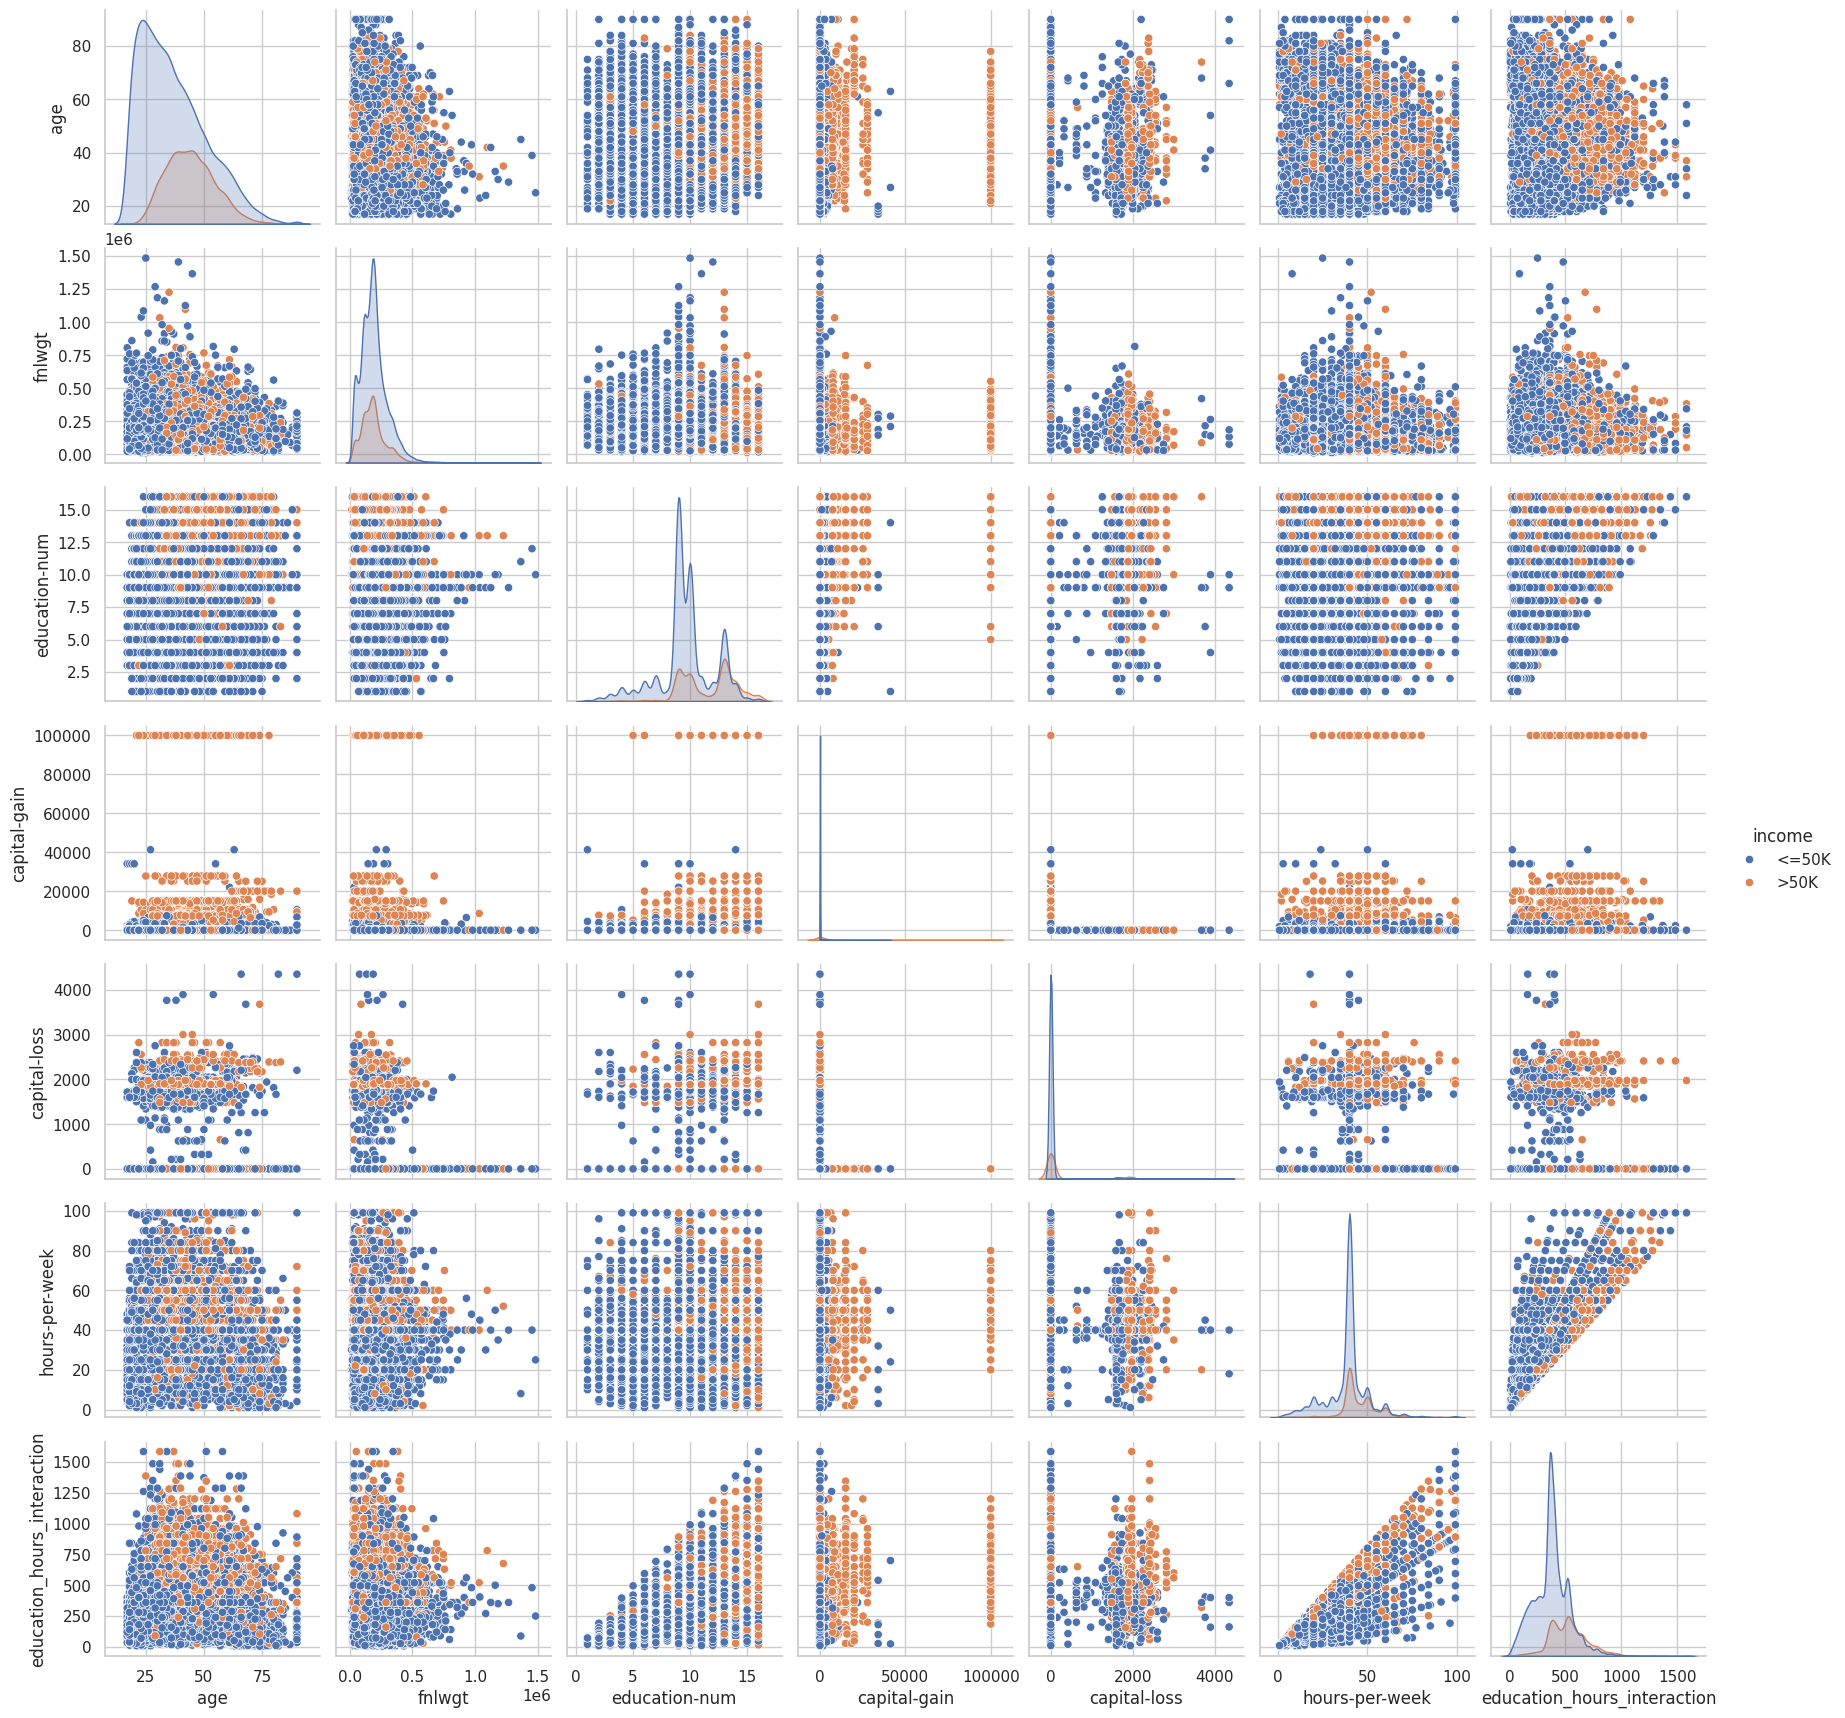

In [28]:
sns.set(style="whitegrid")
sns.pairplot(df, hue='income')
plt.show()

---
## lab12.1 - KNN

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
from scipy import stats

In [29]:
import kagglehub
import pandas as pd

# Step 1: Download latest version of the dataset
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")
print("Path to dataset files:", path)

# Step 2: Load the dataset
df = pd.read_csv(f"{path}/data.csv", index_col='id').reset_index(drop=True)
df.head()
print(df.dtypes)

100%|██████████| 48.6k/48.6k [00:00<00:00, 38.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/uciml/breast-cancer-wisconsin-data/versions/2
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoo

In [33]:
#SPlITTIN DATASET
train_df , test_df = train_test_split(df , test_size=0.3 , random_state=42)

In [43]:
class KNN:
  # simple object for a KNN

  def __init__(self, k =3 , metric='euclidean', p=2):
    self.k = k
    self.metric = metric
    self.p = p
    self.X_train = None
    self.y_train = None
    self.results = []

  # distance/heuristic functions
  def distance(self, v1, v2):
    dist = 0.0
    for a,b in zip(v1,v2):
      # Ensure elements are numeric before calculating difference
      if isinstance(a, (int,float, np.number)) and isinstance(b,(int,float, np.number)):
        diff = abs(a-b)
        if self.metric == 'euclidean':
          dist += diff**2
        elif self.metric == 'manhattan':
          dist += diff
        elif self.metric == 'chebyshev':
          dist = max(dist, diff)
        elif self.metric == 'minkowski':
          dist += diff**self.p
        else:
          raise ValueError(f"Unknown metric: {self.metric}")
      else:
        # Handle non-numeric types or raise an error
        # For simplicity, we'll skip non-numeric comparisons.
        # A more robust solution would require encoding categorical data.
        pass

    # Return final distance calculation based on metric
    if self.metric == 'euclidean':
        return np.sqrt(dist)
    elif self.metric == 'manhattan':
        return dist
    elif self.metric == 'chebyshev':
        return dist
    elif self.metric == 'minkowski':
        # Handle the case where p=0 or dist=0 to avoid errors with power
        if self.p == 0:
          return 0.0 if dist == 0 else float('inf') # Or some other appropriate handling for p=0
        elif dist == 0:
          return 0.0
        else:
          return dist**(1.0/self.p)
    else:
      return dist # Should not be reached due to ValueError

  #store training data...
  def fit(self, X_train, y_train):
    self.X_train = X_train
    self.y_train = y_train


  #finding the K-nearest-neighbhours
  def get_neighbours(self, test_row):
    dists =[]
    if self.X_train is None or self.y_train is None:
      return []
    else:
      # Iterate through training data points and their labels
      for i in range(len(self.X_train)):
        train_row = self.X_train[i]
        label = self.y_train[i]
        dist = self.distance(test_row,train_row)
        dists.append((label,dist)) # appending data ( label , distance )

    dists.sort(key=lambda x : x[1]) # sorting based of distance

    # Return the labels of the top k neighbors
    return [ label for label,_ in dists[:self.k]]


  # Predict labels for test data
  def predict(self, X_test):
    self.results = []
    for x in X_test:
      neighbours = self.get_neighbours(x)
      if neighbours:
        # Perform majority vote on the labels
        # Ensure neighbors are hashable (which labels should be)
        pred = max( set(neighbours) , key=neighbours.count) #majority vote
        self.results.append(pred)
      else:
        self.results.append(None)
    return self.results

In [44]:
#--DRIVER--CODE--
myEucladiean = KNN(3, 'euclidean')
myManhattan = KNN(3, 'manhattan')
myMinkowski = KNN(3, 'minkowski', 2)

myEucladiean.fit(train_df.iloc[:, :-1].values, train_df.iloc[:, -1].values)
myManhattan.fit(train_df.iloc[:, :-1].values, train_df.iloc[:, -1].values)
myMinkowski.fit(train_df.iloc[:, :-1].values, train_df.iloc[:, -1].values)

E_ans  = myEucladiean.predict(test_df.iloc[:, :-1].values)
Ma_ans = myManhattan.predict(test_df.iloc[:, :-1].values)
Mi_ans = myMinkowski.predict(test_df.iloc[:, :-1].values)

---
## lab12.2 -- measuring model performance

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:
[[2 0]
 [0 1]]


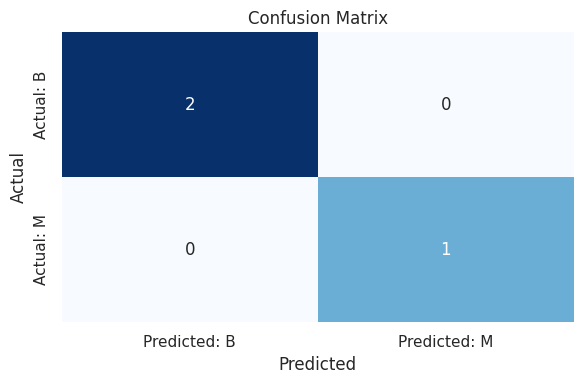


Classification Report:
               precision    recall  f1-score   support

           B       1.00      1.00      1.00         2
           M       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [47]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Your simplified kNN class goes here (paste it before running)
class KNN:
  # simple object for a KNN

  def __init__(self, k =3 , metric='euclidean', p=2):
    self.k = k
    self.metric = metric
    self.p = p
    self.X_train = None
    self.y_train = None
    self.results = []

  # distance/heuristic functions
  def distance(self, v1, v2):
    dist = 0.0
    for a,b in zip(v1,v2):
      # Ensure elements are numeric before calculating difference
      if isinstance(a, (int,float, np.number)) and isinstance(b,(int,float, np.number)):
        diff = abs(a-b)
        if self.metric == 'euclidean':
          dist += diff**2
        elif self.metric == 'manhattan':
          dist += diff
        elif self.metric == 'chebyshev':
          dist = max(dist, diff)
        elif self.metric == 'minkowski':
          dist += diff**self.p
        else:
          raise ValueError(f"Unknown metric: {self.metric}")
      else:
        # Handle non-numeric types or raise an error
        # For simplicity, we'll skip non-numeric comparisons.
        # A more robust solution would require encoding categorical data.
        pass

    # Return final distance calculation based on metric
    if self.metric == 'euclidean':
        return np.sqrt(dist)
    elif self.metric == 'manhattan':
        return dist
    elif self.metric == 'chebyshev':
        return dist
    elif self.metric == 'minkowski':
        # Handle the case where p=0 or dist=0 to avoid errors with power
        if self.p == 0:
          return 0.0 if dist == 0 else float('inf') # Or some other appropriate handling for p=0
        elif dist == 0:
          return 0.0
        else:
          return dist**(1.0/self.p)
    else:
      return dist # Should not be reached due to ValueError

  #store training data...
  def fit(self, X_train, y_train):
    self.X_train = X_train
    self.y_train = y_train


  #finding the K-nearest-neighbhours
  def get_neighbours(self, test_row):
    dists =[]
    if self.X_train is None or self.y_train is None:
      return []
    else:
      # Iterate through training data points and their labels
      for i in range(len(self.X_train)):
        train_row = self.X_train[i]
        label = self.y_train[i]
        dist = self.distance(test_row,train_row)
        dists.append((label,dist)) # appending data ( label , distance )

    dists.sort(key=lambda x : x[1]) # sorting based of distance

    # Return the labels of the top k neighbors
    return [ label for label,_ in dists[:self.k]]


  # Predict labels for test data
  def predict(self, X_test):
    self.results = []
    for x in X_test:
      neighbours = self.get_neighbours(x)
      if neighbours:
        # Perform majority vote on the labels
        # Ensure neighbors are hashable (which labels should be)
        pred = max( set(neighbours) , key=neighbours.count) #majority vote
        self.results.append(pred)
      else:
        self.results.append(None)
    return self.results

# Generate dummy training data
# Columns: f1, f2, ..., label
train_data = {
    'f1': [1.0, 5.0, 1.5, 6.0, 1.2],
    'f2': [2.0, 6.0, 2.2, 6.5, 1.8],
    'label': ['B', 'M', 'B', 'M', 'B']
}
train_df = pd.DataFrame(train_data)

# Generate dummy test data
test_data = {
    'f1': [1.1, 5.2, 1.3],
    'f2': [2.1, 5.9, 2.0],
    'label': ['B', 'M', 'B']  # Ground truth for evaluation
}
test_df = pd.DataFrame(test_data)

# Initialize and train the model
testModl = KNN(k=3, metric='euclidean')
testModl.fit(train_df.iloc[:, :-1].values, train_df.iloc[:, -1].values)

# Predict on test set
test_ans = testModl.predict(test_df.iloc[:, :-1].values)

# Prepare y_true and y_pred for metrics
y_test = []
y_pred = []

for i in range(len(test_ans)):
    # Directly get the predicted label from test_ans
    pred = test_ans[i]
    # Get the actual label from the test_df DataFrame
    actual = test_df['label'].iloc[i]
    y_pred.append(0 if pred == 'B' else 1)
    y_test.append(0 if actual == 'B' else 1)

# Print performance metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted: B', 'Predicted: M'],
            yticklabels=['Actual: B', 'Actual: M'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['B', 'M']))

---
## lab13 Decision Trees

In [68]:
import math

#node of the tree ( leaf or internal)
class Node:
  def __init__(self, is_leaf = False, prediction = None , question = None, true_branch=None, false_branch=None):
    self.is_leaf = is_leaf
    self.prediction = prediction
    self.question = question
    self.true_branch = true_branch # left child
    self.false_branch = false_branch #rght child

#represents a yes/no question used to split teh data
class Question:
  def __init__(self, column, value):
    self.column = column #feature column indx
    self.value = value #value to compare against

  def match(self, row):
    val = row[self.column]
    if isinstance(val,(int,float)): #numerical feature...
      return val >= self.value
    else: #categorical featue...
      return val == self.value

#---HEPLER FUNCTIONS---

def is_numeric(value): # check if the value is numerical
  return isinstance(value, int) or isinstance(value, float)

def class_counts(rows): # count the number of labels we have...
  counts = {}
  for row in rows:
    label = row[-1]
    if label not in counts:
      counts[label] = 0
    counts[label] += 1
  return counts

def gini(rows): # gini impurity..
  counts = class_counts(rows)
  impurity = 1
  for label in counts:
    prob_of_label = counts[label] / len(rows) # probabitity = num_labels_of_x / total_count_of_labels
    impurity -= prob_of_label**2
  return impurity

def entropy(rows): #entropy..
    counts=class_counts(rows)
    impurity=0.0
    # TODO : find the total entrophy for given data ( rows )
    for label in counts:
        prob_of_label=counts[label]/float(len(rows))
        impurity-=prob_of_label*math.log(prob_of_label,2)
    return impurity

def info_gain(left, right, current_uncertainty): # information gain
    p = float(len(left)) / (len(left) + len(right))
    return current_uncertainty - p * gini(left) - (1 - p) * gini(right)
    #return current_uncertainty - p * entropy(left) - (1 - p) * entropy(right)

def partition(rows, question): # split the data based on the question
  true_rows, false_rows = [],[]
  for row in rows:
    if question.match(row):
      true_rows.append(row)
    else:
      false_rows.append(row)
  return true_rows, false_rows


#--- FINDING TEH BEST SPLIT ----
def find_best_split(rows):
    best_gain = 0
    best_question = None
    current_uncertainty = gini(rows)
    #current_uncertainty = entropy(rows)
    n_features = len(rows[0]) -1 # num features

    for col in range(n_features):
      values = set(row[col] for row in rows)
      for val in values:
        question = Question(col,val)
        true_rows, false_rows = partition(rows,question)

        if len(true_rows) == 0 or len(false_rows) == 0:
          continue

        gain = info_gain(true_rows, false_rows, current_uncertainty)

        if gain> best_gain:
          best_gain, best_question = gain, question

    return best_gain, best_question

#--- BUILDING THE TREE ---
def build_tree(rows):
  gain, question = find_best_split(rows)

  if gain == 0:
    return Node(is_leaf=True, prediction=class_counts(rows))

  true_rows, false_rows = partition(rows, question)

  # recursively build branches...
  true_branch = build_tree(true_rows)
  false_branch = build_tree(false_rows)

  return Node(question=question, true_branch=true_branch, false_branch=false_branch)

#--calssifying the nodes---
def classify(row, node):
    if node.is_leaf:
        return node.prediction

    if node.question.match(row):
        return classify(row, node.true_branch)
    else:
        return classify(row, node.false_branch)

# -- PRINTING / VISUALIZATION --
def print_tree(node, spacing=""):
    # Leaf node
    if node.is_leaf:
        print(spacing + "Predict", node.prediction)
        return

    # Print the question at this node
    print(spacing + f"Is feature[{node.question.column}] {'>=' if is_numeric(node.question.value) else '=='} {node.question.value}?")

    # Go deeper into the true branch
    print(spacing + '--> True:')
    print_tree(node.true_branch, spacing + "  ")

    # Go deeper into the false branch
    print(spacing + '--> False:')
    print_tree(node.false_branch, spacing + "  ")


In [71]:
#--- DRIVER CODE ---
# Dummy data: [feature1, feature2, label]
training_data = [
    ['Green', 3, 'Apple'],
    ['Yellow', 3, 'Apple'],
    ['Red', 1, 'Grape'],
    ['Red', 1, 'Grape'],
    ['Yellow', 3, 'Banana'],
]

# Build the decision tree
tree = build_tree(training_data)
#print_tree(tree)
# Predict a new sample
print("\nPrediction for ['Green', 3]:")
sample = ['Green', 3], tree
prediction = classify(['Green', 3], tree)
print("=>", prediction)
print("\n\n--------------------------dtree----------------------\n\n")
print_tree(tree)





Prediction for ['Green', 3]:
=> {'Apple': 1}


--------------------------dtree----------------------


Is feature[0] == Red?
--> True:
  Predict {'Grape': 2}
--> False:
  Is feature[0] == Yellow?
  --> True:
    Predict {'Apple': 1, 'Banana': 1}
  --> False:
    Predict {'Apple': 1}


---
## lab 13 K means clustering

In [1]:
import random
import numpy as np

# Euclidean distance
def euclidean(a, b):
    return np.sqrt(np.sum((a - b)**2))

# Assign points to nearest centroid
def assign_clusters(data, centroids):
    clusters = [[] for _ in centroids]
    for point in data:
        distances = [euclidean(point, centroid) for centroid in centroids]
        cluster_idx = np.argmin(distances)
        clusters[cluster_idx].append(point)
    return clusters

# Update centroids by taking mean of each cluster
def update_centroids(clusters):
    return [np.mean(cluster, axis=0) for cluster in clusters]

# K-means algorithm
def kmeans(data, k, max_iters=100):
    # Step 1: Initialize random centroids
    centroids = random.sample(list(data), k)

    for _ in range(max_iters):
        # Step 2: Assign points to nearest centroid
        clusters = assign_clusters(data, centroids)

        # Step 3: Update centroids
        new_centroids = update_centroids(clusters)

        # Step 4: Check for convergence
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return centroids, clusters


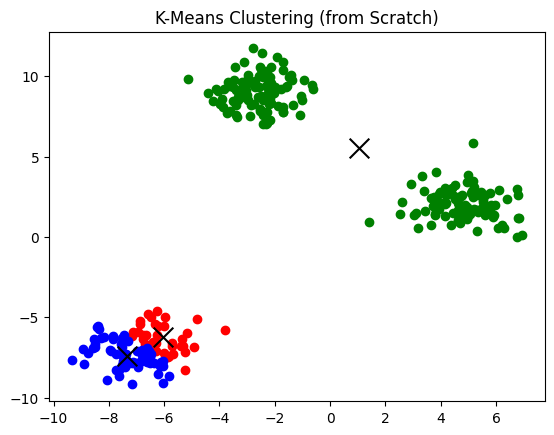

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

data, _ = make_blobs(n_samples=300, centers=3, random_state=42)

centroids, clusters = kmeans(data, k=3)

colors = ['r', 'g', 'b']
for i, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1], color=colors[i])

centroids = np.array(centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='black')
plt.title("K-Means Clustering (from Scratch)")
plt.show()


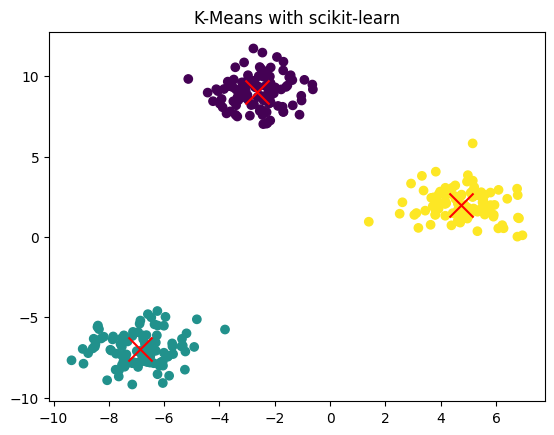

In [3]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate sample data
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Predict clusters
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualize
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='x')
plt.title("K-Means with scikit-learn")
plt.show()


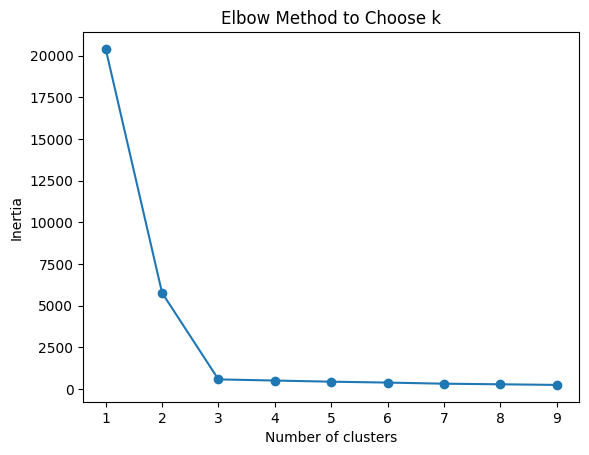

In [4]:
inertias = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)

plt.plot(range(1, 10), inertias, marker='o')
plt.title('Elbow Method to Choose k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
